# Holiday Baking Data on Instagram

#### Sienna Jepsen  
December 10th, 2024

I have recently found a love for baking and I try to incorporate it into my daily life. I usually find recipes that I want to try out from Instagram or Tiktok. Because of this, I was interested in seeing how a social media platform like Instagram uses hashtags that are popular and trending during the holiday seasons for baking. From what I've seen in my own social media consumption recently, there are particular desserts that have been trending this year and I am curious to see if that is reflected in the data that has been collected from November 16th to November 23rd, 2024. Since I wanted to look at data related to baking, my first thought went to social media. Instagram is where I find and see a lot of recipes that I save and follow along with, so my data was gathered from this app using Brandwatch. I would have also liked to look into TikTok also, but Instagram has enough content that it would get overwhelming to use both apps.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.formula.api as smf
import numpy as np

## Finding the Data

#### In order to load in the data, I have created a variable "tac" that will describe the Thanksgiving and Christmas data from Instagram. It has been formatted into a csv file but in order to load it properly, I will have to skip rows 0-5 because they are unreadable. 

In [44]:
tac = pd.read_csv('Sienna-ThanksgivingIG.csv', skiprows = 5)
tac.head()

,Query Id,Query Name,Date,Title,Snippet,Url,Domain,Sentiment,Page Type,Language,...,Tiktok Shares,Weblog Title,[Wizard-1] Content Types - Images,[Wizard-1] Content Types - Videos,[Wizard-1] Hashtag:coronavirus - coronavirus,[Wizard-2] Content Types - Images,[Wizard-2] Content Types - Videos,[Wizard-3] Content Types - Images,[Wizard-3] Content Types - Videos,Emotion
0,2002690947,Sienna-ThanksgivingIG,2024-11-22 20:37:09.0,Thanksgiving cookie set #happythanksgivng #tha...,Thanksgiving cookie set #happythanksgivng #tha...,https://www.instagram.com/p/DCr_NTVv6UZ/,instagram.com,neutral,instagram,en,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joy
1,2002690947,Sienna-ThanksgivingIG,2024-11-22 20:36:27.0,Peach cobbler cheesecake \n\n#peachcobbler #su...,Peach cobbler cheesecake #peachcobbler #suppor...,https://www.instagram.com/p/DCr_IOHTMXK/,instagram.com,neutral,instagram,en,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002690947,Sienna-ThanksgivingIG,2024-11-22 20:35:23.0,This reel omg 🤣This cake is incredibly delicio...,...👉https://abarcascakes.com/product/fancy-pum...,https://www.instagram.com/reel/DCr-t9OPgIB/,instagram.com,positive,instagram,en,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joy
3,2002690947,Sienna-ThanksgivingIG,2024-11-22 20:32:42.0,🎉Let us do the baking for you this Thanksgivin...,...#PeachCobblerPieInAJar #MadeFromScratch #Cu...,https://www.instagram.com/reel/DCr-Qzoysc7/,instagram.com,positive,instagram,en,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joy
4,2002690947,Sienna-ThanksgivingIG,2024-11-22 20:30:31.0,With just 6️⃣ days left until Thanksgiving we ...,...#baking #thanksgivingpies #gunnisoncolorado...,https://www.instagram.com/p/DCr-cxZS3tg/,instagram.com,positive,instagram,en,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sadness


#### The data that I am using for this project comes from Instagram and is gathered by Brandwatch. Brandwatch is a social media analytics and listening tool that has taken data from Instagram with specific hashtags I have requested and pulled 2500 posts and videos that are related. They are a very reliable source to get data from so I know that the information will be accurate and help me with the final result.

In [45]:
for i in tac.columns:
    print(i)

Query Id
Query Name
Date
Title
Snippet
Url
Domain
Sentiment
Page Type
Language
Country Code
Continent Code
Continent
Country
City Code
Account Type
Added
Assignment
Author
Avatar
Category Details
Checked
City
Display URLs
Engagement Score
Entity Info
Expanded URLs
Facebook Author ID
Facebook Comments
Facebook Likes
Facebook Role
Facebook Shares
Facebook Subtype
Full Name
Full Text
Gender
Hashtags
Impact
Impressions
Instagram Comments
Instagram Followers
Instagram Following
Instagram Interactions Count
Instagram Likes
Instagram Posts
Interest
Last Assignment Date
Latitude
Location Name
Longitude
Media Filter
Media URLs
Mentioned Authors
Original Url
Priority
Professions
Resource Id
Short URLs
Starred
Status
Subtype
Tags
Thread Author
Thread Created Date
Thread Entry Type
Thread Id
Thread URL
Total Monthly Visitors
X Author ID
X Channel Role
X Followers
X Following
X Replies
X Reply to
X Repost of
X Reposts
X Likes
X Posts
X Verified
Updated
Reach (new)
Ad Value
Air Type
Asset Content Id

In [46]:
tac_df = tac[['Date', 'Title', 'Url', 'Subtype', 'Hashtags', 'Impressions', 'Instagram Likes', 'Instagram Comments', 'Instagram Interactions Count', 'Instagram Posts']]

#### I am most interested in seeing the comparison between how videos versus photos do when it comes to engagement on Instagram. I tend to gravitate towards videos when looking for recipes or baking ideas, so I am curious to see if that is also a concensus to other users. 

In [47]:
tac_df.groupby('Subtype').count().\
sort_values('Instagram Likes', ascending = False) 

,Date,Title,Url,Hashtags,Impressions,Instagram Likes,Instagram Comments,Instagram Interactions Count,Instagram Posts
Subtype,,,,,,,,,
photo,1883,1883,1883,1883,1883,1883,1883,1883,1883
video,886,886,886,886,886,886,886,886,886


In [48]:
tac_df.groupby('Subtype')[['Instagram Likes', 'Instagram Comments']].describe() #histogram of these

Instagram Likes                                                      \
                  count       mean         std  min  25%  50%   75%     max   
Subtype                                                                       
photo            1883.0   6.448752   32.817596  0.0  0.0  0.0   3.0   762.0   
video             886.0  72.610609  340.352846  0.0  1.0  4.0  19.0  5205.0   

        Instagram Comments                                                     
                     count       mean         std  min  25%  50%  75%     max  
Subtype                                                                        
photo               1883.0   0.801912    5.145859  0.0  0.0  0.0  0.0   104.0  
video                886.0  13.445824  130.884090  0.0  0.0  0.0  3.0  2879.0

## Visualizing the Data

#### In order to visualize the data, I broke the Instagram Comments and Likes into two different dataframes based on their title and respective hashtags. Using histograms and scatterplots, you will see that the data is very heavy on the left side of the graphs. 

In [56]:
tac_df.sort_values('Instagram Comments', ascending = False)[['Title', 'Hashtags']].head(15) 

,Title,Hashtags
2611,🎄 Comment “cinnamon” for this recipe! \n\nBrea...,"#cinnamonrolls, #healthybreakfast, #easyrecipe..."
2416,You’ve been asking for my go-to sugar cookie r...,"#christmascookies, #holidaybaking, #cookiereci..."
1310,Peeps! Did you know that my melted butter pie ...,"#réel, #thanksgivingdessert"
865,Reindeer Cheesecake Bars🦌 YAY or NAY? Who want...,"#christmasbaking, #reindeer, #cheesecakebars, ..."
799,"Move over, pies—there’s a new star on the Than...","#thanksgivingdessert, #holidaybaking, #dessert..."
1071,12 Days of Holiday Cookies Day 4! \n\nWhite Ch...,#christmasdessert
1393,"🎄 Keep your holidays joyful, not messy! Fresh ...","#freshkitchenco, #blackfridaysale, #holidaybak..."
420,"Healthy pumpkin pie cups that are gluten-free,...","#pumpkin, #pumpkinrecipes, #pumpkinspice, #tha..."
851,"TIRAMISU COOKIE BARS!☕️🍪 (gluten-free, dairy-f...",#holidaybaking
2313,🎄✨ Holiday Cake Giveaway Time! ✨🎄\n\n‘Tis the ...,"#holidaycakegiveaway, #customcakes, #vineyardu..."


In [57]:
tac_df.sort_values('Instagram Likes', ascending = False)[['Title', 'Hashtags']].head(15)

,Title,Hashtags
668,Holiday hosting and meal prep favorites 🤍🎄🎀! E...,"#amazonfinds, #amazonhome, #amazonhomefinds, #..."
2497,Tis the season for Buttermilk Biscuits with Cr...,"#baking, #buttermilkbiscuits, #cranberrysauce,..."
865,Reindeer Cheesecake Bars🦌 YAY or NAY? Who want...,"#christmasbaking, #reindeer, #cheesecakebars, ..."
632,Nutella stuffed cookie pie for Christmas 🎄\n\n...,"#fitwaffle, #fitwafflekitchen, #christmasbaking"
1603,Christmas Tree Brownies 🎄🍫 Recipe👇\n\nChocolat...,"#janespatisserie, #christmasbakes, #christmasr..."
2692,25 Bakes of Christmas: Ep 6\nChristmas (tree) ...,"#cakeart, #bakeoff, #gbbo, #chocolatecake, #ch..."
2611,🎄 Comment “cinnamon” for this recipe! \n\nBrea...,"#cinnamonrolls, #healthybreakfast, #easyrecipe..."
2416,You’ve been asking for my go-to sugar cookie r...,"#christmascookies, #holidaybaking, #cookiereci..."
788,pecan pie hates to see me coming \n\n#gymlifes...,"#gymlifestyle, #holidaytreats, #holidayseason"
881,White Chocolate Peppermint Cupcakes 🤍🍬✨\n\nFlu...,"#whitechocolate, #peppermint, #cupcakes, #chri..."


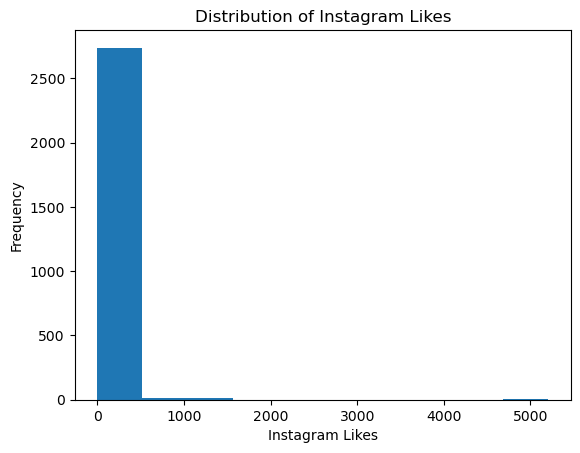

In [59]:
sorted_df = tac_df.sort_values('Instagram Likes', ascending=False)
plt.hist(sorted_df['Instagram Likes'])  
plt.xlabel('Instagram Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Instagram Likes')
plt.show()

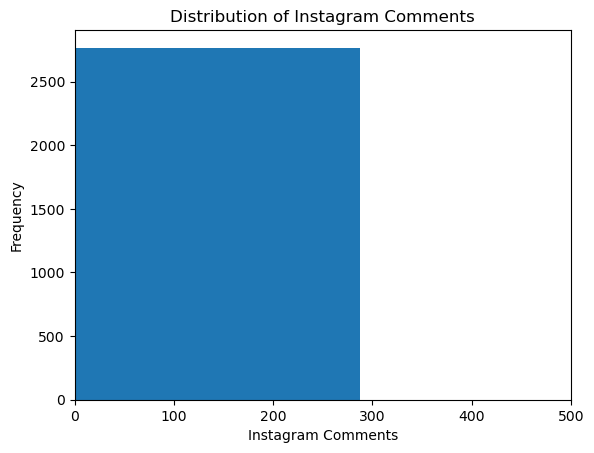

In [67]:
sorted_df = tac_df.sort_values('Instagram Comments', ascending=False)
plt.hist(sorted_df['Instagram Comments'], bins= 10)  
plt.xlabel('Instagram Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Instagram Comments')
plt.xlim(0, 500)
plt.show()

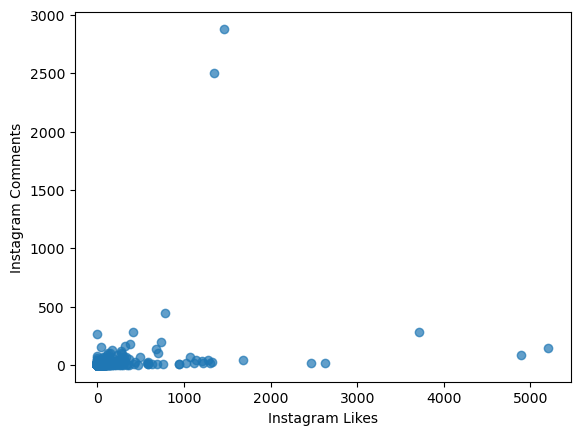

In [50]:
fig2, ax2 = plt.subplots()
ax2.scatter(tac['Instagram Likes'], tac['Instagram Comments'], alpha = .7)
plt.xlabel('Instagram Likes')
plt.ylabel('Instagram Comments')
plt.show()

#### By creating these three graphs, it is obvious that they are not the best representations of the data to visualize. There is quite a strong amount of data between 0 and 500, so it is very centralized and not easy on the eyes.  

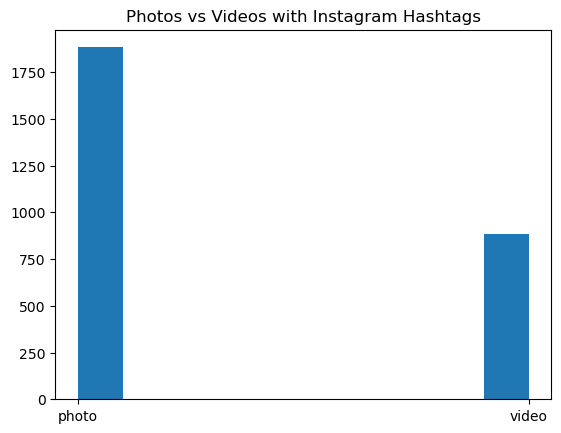

In [65]:
fig1, ax1 = plt.subplots() 
ax1.hist(tac['Subtype'])
plt.title('Photos vs Videos with Instagram Hashtags')
plt.show() 

#### This simple histogram shows us that there are more photos than videos when it comes to Instagram likes and comments that use the holiday hashtags I gathered from Brandwatch.

## Conclusion

By gathering data from Instagram that includes hashtags that are Thanksgiving and Christmas themed, I found that there are significantly more photos compared to videos. This was shocking to me because I find videos to be more effective when it comes to finding recipes or baking advice through Instagram. Over the week that this data was taken from, the scatterplot shows that there were not a lot a posts that had an especially viral moment. The post with the most likes has a little over 5,000 likes and in the grand scheme of social media, this number is very low. 
There were a few limitations when it came to this data, starting with the usage of the hashtags. I think that looking at the kind of hashtags that were available for the posts was the right idea initially, but I found it difficult to actually use those key words in the data wrangling. As I continued through this analysis more, it seemed more probable to look at the numbers associated with the hashtags related to photos and videos instead of the actual words. 
I also found it difficult to display the data that I was gathering into a graph that best supported it. All of the data wanted to clump into one plot and I wasn't able to find a different way that could break it down further. 
The main takeaway from this data shows that holiday baking photos have better engagement on Instagram than videos do, based on the number of likes compared to comments on posts with hashtags related to Thanksgiving and Christmas baking. 